In [101]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score
import statsmodels.formula.api as smf
import seaborn as sns
import pickle




In [15]:
rainfall = pd.read_csv('./venv/rainfall.csv')

In [16]:
rainfall.head()

,Dist Code,Year,State Code,State Name,Dist Name,ANNUAL RAINFALL (Millimeters)
0,72,1990,5,Karnataka,Chitradurga,492.0
1,72,1991,5,Karnataka,Chitradurga,706.0
2,72,1992,5,Karnataka,Chitradurga,700.0
3,72,1993,5,Karnataka,Chitradurga,557.0
4,72,1994,5,Karnataka,Chitradurga,504.4


In [17]:

# Group by the 'Year' column and calculate the mean of 'ANNUAL RAINFALL (Millimeters)'
average_rainfall_per_year = rainfall.groupby('Year')['ANNUAL RAINFALL (Millimeters)'].mean()


In [18]:
rainfall_average = pd.DataFrame(average_rainfall_per_year).reset_index()
rainfall_average.head()

,Year,ANNUAL RAINFALL (Millimeters)
0,1990,568.00
1,1991,671.50
2,1992,656.50
3,1993,630.50
4,1994,470.95


In [19]:
crops = pd.read_csv('./venv/crops.csv')
crops.head()

,Dist Code,Year,State Code,State Name,Dist Name,RICE AREA (1000 ha),RICE PRODUCTION (1000 tons),RICE YIELD (Kg per ha),SORGHUM AREA (1000 ha),SORGHUM PRODUCTION (1000 tons),...,FINGER MILLET YIELD (Kg per ha),CHICKPEA AREA (1000 ha),CHICKPEA PRODUCTION (1000 tons),CHICKPEA YIELD (Kg per ha),PIGEONPEA AREA (1000 ha),PIGEONPEA PRODUCTION (1000 tons),PIGEONPEA YIELD (Kg per ha),GROUNDNUT AREA (1000 ha),GROUNDNUT PRODUCTION (1000 tons),GROUNDNUT YIELD (Kg per ha)
0,72,1990,5,Karnataka,Chitradurga,58.61,177.23,3024.0,89.12,78.94,...,775.0,2.82,0.49,174.0,12.22,5.81,475.0,141.98,79.15,557.0
1,72,1991,5,Karnataka,Chitradurga,41.09,105.15,2559.0,83.39,120.91,...,1221.0,3.45,1.02,296.0,11.63,8.69,747.0,161.35,146.35,907.0
2,72,1992,5,Karnataka,Chitradurga,71.19,212.51,2985.0,81.67,99.29,...,1282.0,3.27,1.20,367.0,13.82,9.53,690.0,189.60,206.83,1091.0
3,72,1993,5,Karnataka,Chitradurga,75.54,220.67,2921.0,77.01,105.97,...,1274.0,2.78,0.88,317.0,10.75,6.23,580.0,198.37,171.04,862.0
4,72,1994,5,Karnataka,Chitradurga,73.94,230.25,3114.0,66.24,82.68,...,1273.0,3.00,1.98,660.0,11.04,3.97,360.0,170.81,125.33,734.0


In [23]:
# List of crops
crops_list = ['RICE', 'SORGHUM', 'MAIZE', 'FINGER MILLET', 'CHICKPEA', 'PIGEONPEA', 'GROUNDNUT']

# Initialize an empty DataFrame
crops_data = pd.DataFrame()

In [24]:
# For each crop, calculate the sum of AREA, PRODUCTION, and YIELD for each year
for crop in crops_list:
    temp_df = crops.groupby('Year')[[f'{crop} AREA (1000 ha)',
                                      f'{crop} PRODUCTION (1000 tons)',
                                      f'{crop} YIELD (Kg per ha)']].sum()
    temp_df = temp_df.add_prefix(f'')
    if crops_data.empty:
        crops_data = temp_df
    else:
        crops_data = crops_data.join(temp_df)


In [82]:

crops_data['RICE YIELD (Kg per ha)'] = crops_data['RICE PRODUCTION (1000 tons)'] / crops_data['RICE AREA (1000 ha)'] * 1000
crops_data['SORGHUM YIELD (Kg per ha)'] = crops_data['SORGHUM PRODUCTION (1000 tons)'] / crops_data['SORGHUM AREA (1000 ha)'] * 1000
crops_data['MAIZE YIELD (Kg per ha)'] = crops_data['MAIZE PRODUCTION (1000 tons)'] / crops_data['MAIZE AREA (1000 ha)'] * 1000
crops_data['FINGER MILLET YIELD (Kg per ha)'] = crops_data['FINGER MILLET PRODUCTION (1000 tons)'] / crops_data['FINGER MILLET AREA (1000 ha)'] * 1000
crops_data['CHICKPEA YIELD (Kg per ha)'] = crops_data['CHICKPEA PRODUCTION (1000 tons)'] / crops_data['CHICKPEA AREA (1000 ha)'] * 1000
crops_data['PIGEONPEA YIELD (Kg per ha)'] = crops_data['PIGEONPEA PRODUCTION (1000 tons)'] / crops_data['PIGEONPEA AREA (1000 ha)'] * 1000
crops_data['GROUNDNUT YIELD (Kg per ha)'] = crops_data['GROUNDNUT PRODUCTION (1000 tons)'] / crops_data['GROUNDNUT AREA (1000 ha)'] * 1000


In [83]:
crops_data.head()

,RICE AREA (1000 ha),RICE PRODUCTION (1000 tons),RICE YIELD (Kg per ha),SORGHUM AREA (1000 ha),SORGHUM PRODUCTION (1000 tons),SORGHUM YIELD (Kg per ha),MAIZE AREA (1000 ha),MAIZE PRODUCTION (1000 tons),MAIZE YIELD (Kg per ha),FINGER MILLET AREA (1000 ha),...,FINGER MILLET YIELD (Kg per ha),CHICKPEA AREA (1000 ha),CHICKPEA PRODUCTION (1000 tons),CHICKPEA YIELD (Kg per ha),PIGEONPEA AREA (1000 ha),PIGEONPEA PRODUCTION (1000 tons),PIGEONPEA YIELD (Kg per ha),GROUNDNUT AREA (1000 ha),GROUNDNUT PRODUCTION (1000 tons),GROUNDNUT YIELD (Kg per ha)
Year,,,,,,,,,,,,,,,,,,,,,
1990,101.00,301.35,2983.663366,271.78,254.40,936.051218,47.25,126.91,2685.925926,136.22,...,730.582881,11.42,2.65,232.049037,28.57,11.46,401.120056,222.84,145.55,653.159217
1991,83.19,215.30,2588.051448,253.30,296.05,1168.772207,63.77,207.26,3250.117610,116.62,...,1113.531127,8.96,2.98,332.589286,26.32,18.57,705.547112,241.15,222.67,923.367199
1992,120.49,341.83,2836.998921,267.56,261.53,977.462999,87.72,276.28,3149.566803,106.49,...,1186.872007,8.34,3.29,394.484412,29.67,17.15,578.024941,274.86,276.33,1005.348177
1993,129.03,361.84,2804.309075,229.87,255.11,1109.801192,69.48,221.21,3183.793898,115.48,...,1224.974021,7.82,2.92,373.401535,24.47,12.85,525.132816,277.29,249.33,899.166937
1994,132.84,374.54,2819.482084,196.51,197.26,1003.816600,87.96,272.68,3100.045475,103.32,...,1190.960124,12.46,6.02,483.146067,23.54,11.72,497.875956,259.08,199.83,771.306160


In [84]:
crops_df = pd.merge(crops_data, rainfall_average, on='Year')
crops_df.head()


,Year,RICE AREA (1000 ha),RICE PRODUCTION (1000 tons),RICE YIELD (Kg per ha),SORGHUM AREA (1000 ha),SORGHUM PRODUCTION (1000 tons),SORGHUM YIELD (Kg per ha),MAIZE AREA (1000 ha),MAIZE PRODUCTION (1000 tons),MAIZE YIELD (Kg per ha),...,CHICKPEA AREA (1000 ha),CHICKPEA PRODUCTION (1000 tons),CHICKPEA YIELD (Kg per ha),PIGEONPEA AREA (1000 ha),PIGEONPEA PRODUCTION (1000 tons),PIGEONPEA YIELD (Kg per ha),GROUNDNUT AREA (1000 ha),GROUNDNUT PRODUCTION (1000 tons),GROUNDNUT YIELD (Kg per ha),ANNUAL RAINFALL (Millimeters)
0,1990,101.00,301.35,2983.663366,271.78,254.40,936.051218,47.25,126.91,2685.925926,...,11.42,2.65,232.049037,28.57,11.46,401.120056,222.84,145.55,653.159217,568.00
1,1991,83.19,215.30,2588.051448,253.30,296.05,1168.772207,63.77,207.26,3250.117610,...,8.96,2.98,332.589286,26.32,18.57,705.547112,241.15,222.67,923.367199,671.50
2,1992,120.49,341.83,2836.998921,267.56,261.53,977.462999,87.72,276.28,3149.566803,...,8.34,3.29,394.484412,29.67,17.15,578.024941,274.86,276.33,1005.348177,656.50
3,1993,129.03,361.84,2804.309075,229.87,255.11,1109.801192,69.48,221.21,3183.793898,...,7.82,2.92,373.401535,24.47,12.85,525.132816,277.29,249.33,899.166937,630.50
4,1994,132.84,374.54,2819.482084,196.51,197.26,1003.816600,87.96,272.68,3100.045475,...,12.46,6.02,483.146067,23.54,11.72,497.875956,259.08,199.83,771.306160,470.95


In [85]:
lookup_table = pd.DataFrame(columns=['Crop', 'Variable', 'Intercept', 'Slope'])


# For each crop, run a linear regression for AREA, PRODUCTION, and YIELD against rainfall
for crop in crops_list:
    for variable in ['AREA (1000 ha)', 'PRODUCTION (1000 tons)', 'YIELD (Kg per ha)']:
        X = crops_df[['ANNUAL RAINFALL (Millimeters)']]
        y = crops_df[f'{crop} {variable}']

        # Create a LinearRegression object
        reg = LinearRegression()

        # Fit the model
        reg.fit(X, y)

            # Predict y values based on the regression equation
    y_pred = reg.predict(X)

    # Calculate the R^2 score
    r2 = r2_score(y, y_pred)

    result = pd.DataFrame([{
        'Crop': crop,
        'Variable': variable,
        'Intercept': reg.intercept_,
        'Slope': reg.coef_[0],
        'R2 Score': r2
    }])

        # Concatenate the results DataFrame with the lookup table
    lookup_table = pd.concat([lookup_table, result], ignore_index=True)




In [86]:
lookup_table.head()


,Crop,Variable,Intercept,Slope,R2 Score
0,RICE,YIELD (Kg per ha),2677.443108,0.595553,0.116019
1,SORGHUM,YIELD (Kg per ha),570.044222,0.831745,0.315128
2,MAIZE,YIELD (Kg per ha),1937.993751,1.505714,0.179583
3,FINGER MILLET,YIELD (Kg per ha),569.702131,1.137997,0.354201
4,CHICKPEA,YIELD (Kg per ha),178.129712,0.431115,0.294147


In [87]:
lookup_table.to_pickle('./venv/pickles/rainfall_crops_regression.pkl')

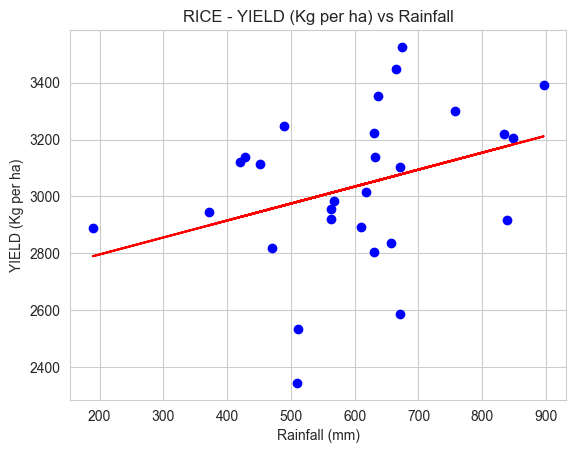

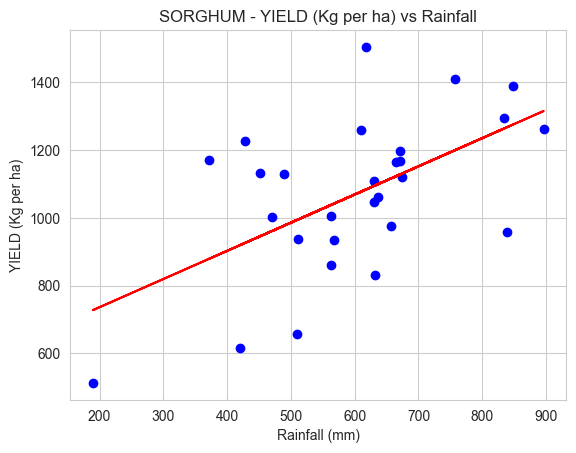

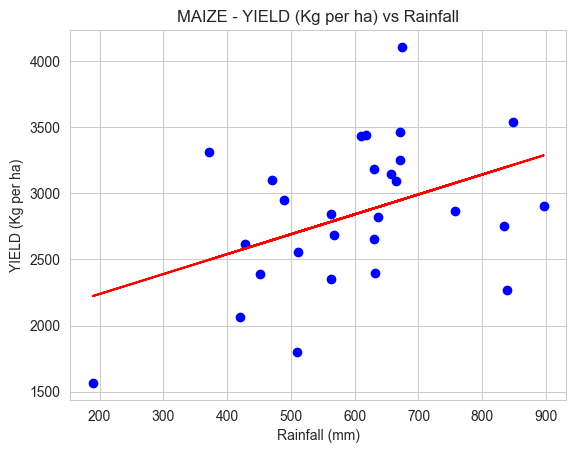

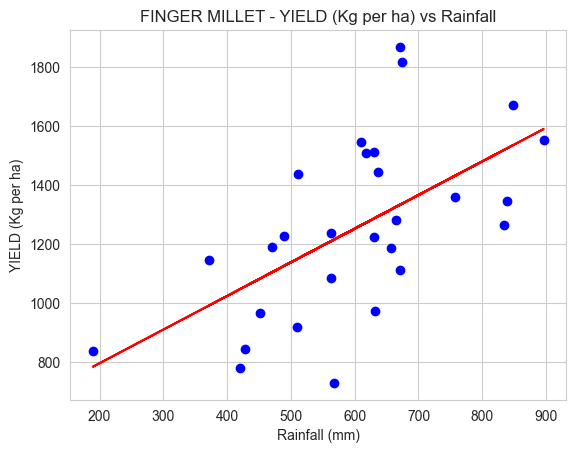

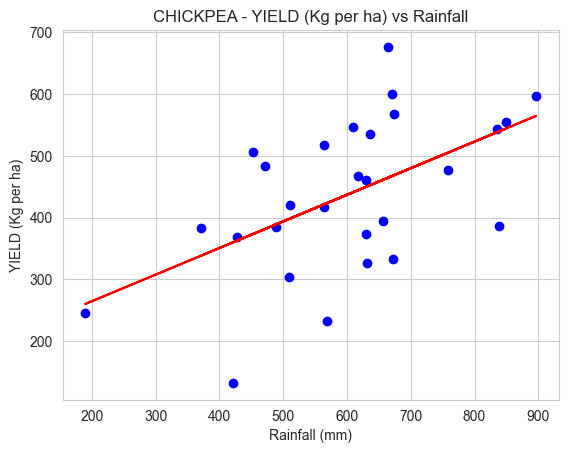

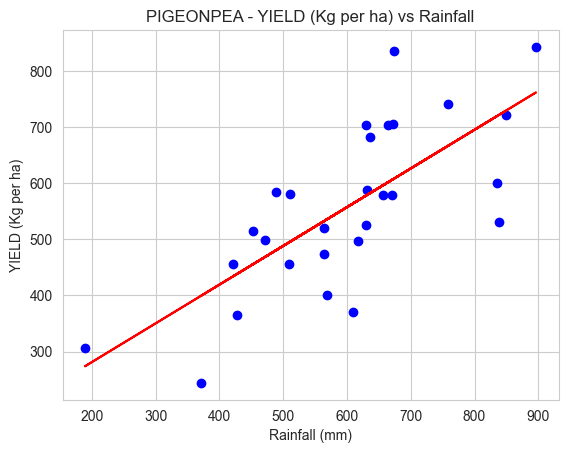

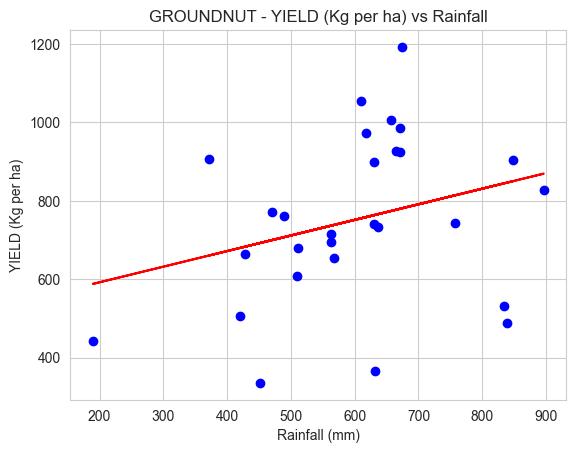

In [88]:
# For each row in the lookup table
for index, row in lookup_table.iterrows():
    # Get crop and variable
    crop = row['Crop']
    variable = row['Variable']

    # Get X and y values
    X = crops_df[['ANNUAL RAINFALL (Millimeters)']]
    y = crops_df[f'{crop} {variable}']

    # Predict y values based on the regression equation
    y_pred = row['Intercept'] + row['Slope'] * X

    # Create a new figure
    plt.figure()

    # Scatter plot of the actual data
    plt.scatter(X, y, color='blue')

    # Line plot of the predicted values
    plt.plot(X, y_pred, color='red')

    # Set title and labels
    plt.title(f'{crop} - {variable} vs Rainfall')
    plt.xlabel('Rainfall (mm)')
    plt.ylabel(variable)

    # Show the plot
    plt.show()

In [89]:
# Filter out rows where Variable is 'YIELD (Kg per ha)'
lookup_table_yield = lookup_table[lookup_table['Variable'] == 'YIELD (Kg per ha)']

lookup_table_yield.head()

,Crop,Variable,Intercept,Slope,R2 Score
0,RICE,YIELD (Kg per ha),2677.443108,0.595553,0.116019
1,SORGHUM,YIELD (Kg per ha),570.044222,0.831745,0.315128
2,MAIZE,YIELD (Kg per ha),1937.993751,1.505714,0.179583
3,FINGER MILLET,YIELD (Kg per ha),569.702131,1.137997,0.354201
4,CHICKPEA,YIELD (Kg per ha),178.129712,0.431115,0.294147


In [90]:
lookup_table_yield

,Crop,Variable,Intercept,Slope,R2 Score
0,RICE,YIELD (Kg per ha),2677.443108,0.595553,0.116019
1,SORGHUM,YIELD (Kg per ha),570.044222,0.831745,0.315128
2,MAIZE,YIELD (Kg per ha),1937.993751,1.505714,0.179583
3,FINGER MILLET,YIELD (Kg per ha),569.702131,1.137997,0.354201
4,CHICKPEA,YIELD (Kg per ha),178.129712,0.431115,0.294147
5,PIGEONPEA,YIELD (Kg per ha),143.198539,0.689907,0.528595
6,GROUNDNUT,YIELD (Kg per ha),512.504281,0.398021,0.085716


In [91]:
lookup_table_yield.to_pickle('./venv/pickles/lookup_table_yield.pkl')

In [95]:
# Create an empty list for storing results
results = []

# For each crop, run a linear regression for YIELD against rainfall
for crop in crops_list:
    X = crops_df[['ANNUAL RAINFALL (Millimeters)']]
    y = crops_df[f'{crop} YIELD (Kg per ha)']

    # Add constant to the model, because statsmodels' LinearRegression doesn't have it by default
    X = sm.add_constant(X)

    # Create an OLS model
    model = sm.OLS(y, X)

    # Fit the model
    result = model.fit()

    # Get the statistics
    intercept, slope = result.params
    r2_score = result.rsquared
    p_value = result.pvalues[1]  # pvalues[0] is the p-value for the intercept


    # Add the results to the list
    results.append({
        'Crop': crop,
        'Variable': 'YIELD (Kg per ha)',
        'Intercept': intercept,
        'Slope': slope,
        'R2 Score': r2_score,
        'P Value': p_value
    })

# Convert the results list to a DataFrame
lookup_table = pd.DataFrame(results)

In [93]:
lookup_table

,Crop,Variable,Intercept,Slope,R2 Score,P Value
0,RICE,YIELD (Kg per ha),2677.443108,0.595553,0.116019,0.076118
1,SORGHUM,YIELD (Kg per ha),570.044222,0.831745,0.315128,0.001883
2,MAIZE,YIELD (Kg per ha),1937.993751,1.505714,0.179583,0.024624
3,FINGER MILLET,YIELD (Kg per ha),569.702131,1.137997,0.354201,0.000836
4,CHICKPEA,YIELD (Kg per ha),178.129712,0.431115,0.294147,0.002868
5,PIGEONPEA,YIELD (Kg per ha),143.198539,0.689907,0.528595,0.000012
6,GROUNDNUT,YIELD (Kg per ha),512.504281,0.398021,0.085716,0.130552


In [98]:
residuals_dict = {}

for crop in crops_list:
    model = smf.ols(formula=f'Q("{crop} YIELD (Kg per ha)") ~ Q("ANNUAL RAINFALL (Millimeters)")', data=crops_df)
    results = model.fit()

    # compute residuals
    residuals_dict[crop] = results.resid

In [99]:
residuals_dict

{'RICE': 0     -32.053722
 1    -489.305353
 2    -231.424589
 3    -248.630062
 4    -138.436607
 5      46.155042
 6     -30.870045
 7     206.878537
 8    -146.380043
 9     -93.274996
 10     27.396782
 11   -446.219166
 12   -635.182243
 13     99.692335
 14    296.468631
 15     43.760001
 16     83.425027
 17    172.089304
 18    167.119362
 19   -259.776447
 20     22.997112
 21    277.236110
 22    -55.660584
 23    373.129956
 24    181.305005
 25    170.263629
 26    193.126143
 27    446.170882
 dtype: float64,
 'SORGHUM': 0    -106.423905
 1      40.211523
 2    -138.621517
 3      15.342035
 4      42.062284
 5     291.707053
 6     420.611995
 7     300.128202
 8     181.909081
 9     -34.195765
 10     69.619354
 11    -57.450282
 12   -337.192879
 13   -214.745925
 14    -35.970409
 15     29.150586
 16   -263.653756
 17    209.554009
 18    186.794923
 19   -310.502492
 20    113.190656
 21    153.181688
 22   -178.594577
 23     41.186151
 24    -54.233077
 25    -47

In [102]:
with open('venv/pickles/yield_residuals_dict.pkl', 'wb') as f:
    pickle.dump(residuals_dict, f)

----------------------------------------------------------------------------------------------------------

In [56]:

districtwise_crops = pd.merge(crops, rainfall_average, on='Year', how='left')

districtwise_crops.rename(columns={'ANNUAL RAINFALL (Millimeters)':'Average_rainfall'}, inplace=True)


In [58]:
districtwise_crops.head()

,Dist Code,Year,State Code,State Name,Dist Name,RICE AREA (1000 ha),RICE PRODUCTION (1000 tons),RICE YIELD (Kg per ha),SORGHUM AREA (1000 ha),SORGHUM PRODUCTION (1000 tons),...,CHICKPEA AREA (1000 ha),CHICKPEA PRODUCTION (1000 tons),CHICKPEA YIELD (Kg per ha),PIGEONPEA AREA (1000 ha),PIGEONPEA PRODUCTION (1000 tons),PIGEONPEA YIELD (Kg per ha),GROUNDNUT AREA (1000 ha),GROUNDNUT PRODUCTION (1000 tons),GROUNDNUT YIELD (Kg per ha),Average_rainfall
0,72,1990,5,Karnataka,Chitradurga,58.61,177.23,3024.0,89.12,78.94,...,2.82,0.49,174.0,12.22,5.81,475.0,141.98,79.15,557.0,568.00
1,72,1991,5,Karnataka,Chitradurga,41.09,105.15,2559.0,83.39,120.91,...,3.45,1.02,296.0,11.63,8.69,747.0,161.35,146.35,907.0,671.50
2,72,1992,5,Karnataka,Chitradurga,71.19,212.51,2985.0,81.67,99.29,...,3.27,1.20,367.0,13.82,9.53,690.0,189.60,206.83,1091.0,656.50
3,72,1993,5,Karnataka,Chitradurga,75.54,220.67,2921.0,77.01,105.97,...,2.78,0.88,317.0,10.75,6.23,580.0,198.37,171.04,862.0,630.50
4,72,1994,5,Karnataka,Chitradurga,73.94,230.25,3114.0,66.24,82.68,...,3.00,1.98,660.0,11.04,3.97,360.0,170.81,125.33,734.0,470.95


In [79]:
crop_list_1 = ['RICE YIELD (Kg per ha)', 'SORGHUM YIELD (Kg per ha)', 'MAIZE YIELD (Kg per ha)',
             'FINGER MILLET YIELD (Kg per ha)', 'CHICKPEA YIELD (Kg per ha)',
             'PIGEONPEA YIELD (Kg per ha)', 'GROUNDNUT YIELD (Kg per ha)']

lookup_table_new = {'Crop': [], 'Intercept': [], 'Slope': [], 'r_squared': [], 'p_value': []}


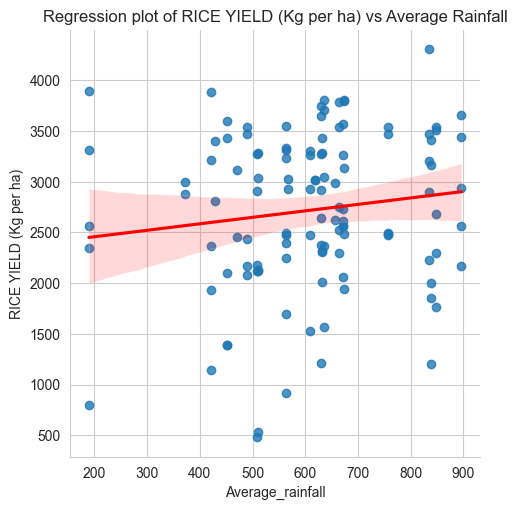

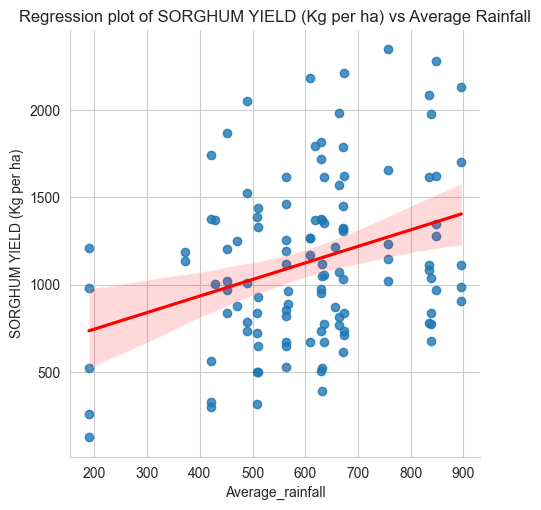

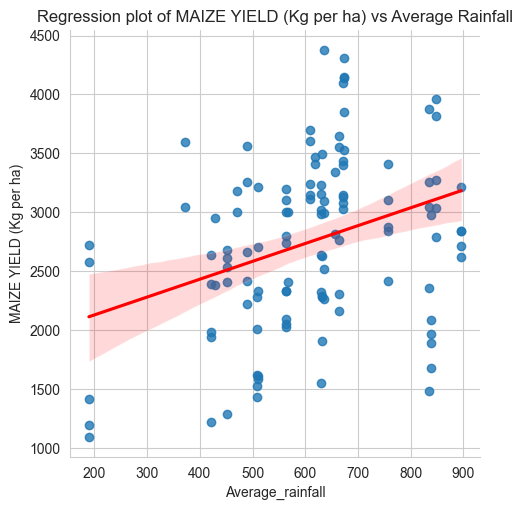

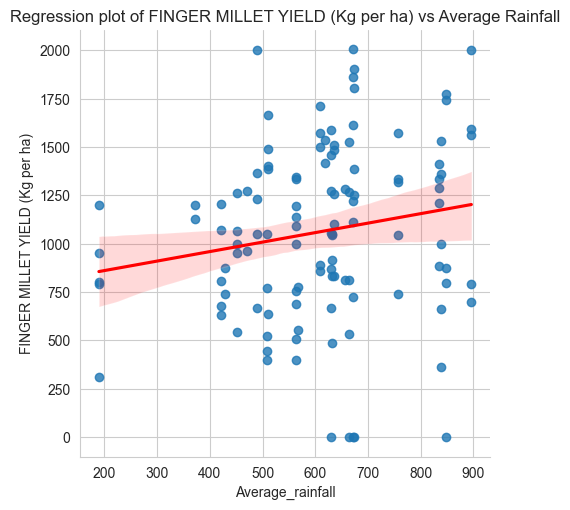

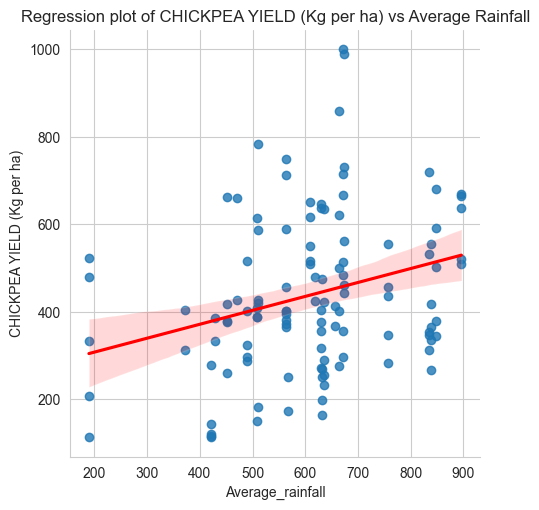

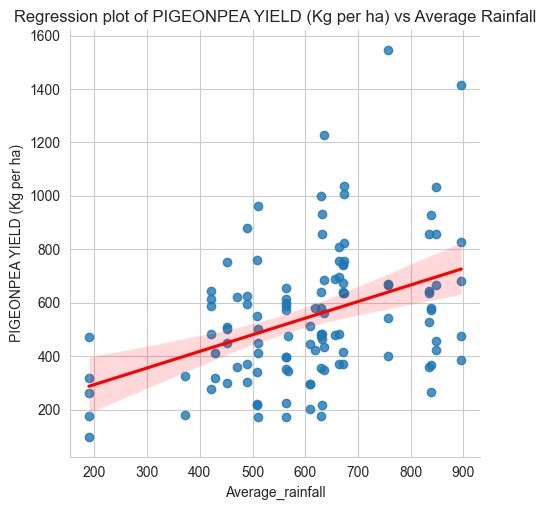

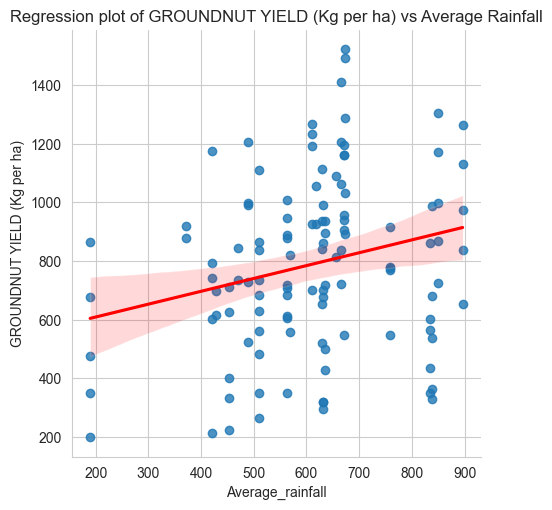

In [80]:
for crop in crop_list_1:
    # Fit the regression model
    model = smf.ols(formula=f"Q('{crop}') ~ Q('Average_rainfall')", data=districtwise_crops).fit()

    # Add model results to the lookup table
    lookup_table_new['Crop'].append(crop)
    lookup_table_new['Intercept'].append(model.params['Intercept'])
    lookup_table_new['Slope'].append(model.params['Q(\'Average_rainfall\')'])
    lookup_table_new['r_squared'].append(model.rsquared)
    lookup_table_new['p_value'].append(model.pvalues['Q(\'Average_rainfall\')'])

    # Generate the plot
    sns.lmplot(x='Average_rainfall', y=crop, data=districtwise_crops, line_kws={'color': 'red'})
    plt.title(f'Regression plot of {crop} vs Average Rainfall')
    plt.show()

In [81]:
lookup_table_new

{'Crop': ['RICE YIELD (Kg per ha)',
  'SORGHUM YIELD (Kg per ha)',
  'MAIZE YIELD (Kg per ha)',
  'FINGER MILLET YIELD (Kg per ha)',
  'CHICKPEA YIELD (Kg per ha)',
  'PIGEONPEA YIELD (Kg per ha)',
  'GROUNDNUT YIELD (Kg per ha)'],
 'Intercept': [2329.5738428733557,
  556.2911541307976,
  1827.0528238897411,
  762.8515958883712,
  243.93884695376448,
  169.9684283082149,
  521.8372640623548],
 'Slope': [0.6376773848287616,
  0.9456194866710759,
  1.5141001627060355,
  0.4905454597415492,
  0.3184414423224677,
  0.620829157897186,
  0.4377969290073299],
 'r_squared': [0.01756932672229994,
  0.10258836860749343,
  0.11391326913289201,
  0.030649342111839895,
  0.08287391800985189,
  0.15528432523854063,
  0.05814189754644572],
 'p_value': [0.1560721416079305,
  0.0004563888208417191,
  0.00021133921983152004,
  0.06015159535508519,
  0.00172687366775369,
  1.2051596139780701e-05,
  0.009121204802129045]}